In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Mrinal Kalita/Python Projects/turnover hackathon/Train_dataset_(2)_(1).csv')
test = pd.read_csv('C:/Users/Mrinal Kalita/Python Projects/turnover hackathon/Test_dataset_(2)_(1).csv')

In [3]:
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [4]:
df.shape

(3493, 34)

# Data Cleaning and Data Preprocessing

In [5]:
#Dropping registration number, city, day of openning columns
df = df.drop(['Registration Number','City','Opening Day of Restaurant'],axis=1)
test_df = test.drop(['Registration Number','City','Opening Day of Restaurant'],axis=1)

In [6]:
df.head()

,Annual Turnover,Cuisine,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,42000000,"indian,irish",Near Business Hub,84.3,Not Specific,95.8,1,1,1,0,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,50000000,"indian,irish",Near Party Hub,85.4,Tier A Celebrity,85.0,1,1,1,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,32500000,"tibetan,italian",Near Business Hub,85.0,Tier A Celebrity,68.2,1,1,1,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,110000000,"turkish,nigerian",Near Party Hub,85.6,Tier A Celebrity,83.6,0,1,1,1,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,20000000,"irish,belgian",Near Party Hub,NaN,Tier A Celebrity,76.8,1,1,1,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [7]:
#Checking duplicate Value
df.duplicated().sum()

0

In [8]:
#Checking missing values
df.isnull().sum()

Annual Turnover                     0
Cuisine                             0
Restaurant Location                 0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs Rating               2483
Value Deals Rating               2707
Live Sports Rating               3288
Ambience    

In [9]:
df['Live Music Rating'] = df['Live Music Rating'].fillna(0)
df['Comedy Gigs Rating'] = df['Comedy Gigs Rating'].fillna(0)
df['Value Deals Rating'] = df['Value Deals Rating'].fillna(0)
df['Live Sports Rating'] = df['Live Sports Rating'].fillna(0)
df['Facebook Popularity Quotient'] = df['Facebook Popularity Quotient'].fillna(df['Facebook Popularity Quotient'].mean())
df['Instagram Popularity Quotient'] = df['Instagram Popularity Quotient'].fillna(df['Instagram Popularity Quotient'].mean())
df['Resturant Tier'] = df['Resturant Tier'].fillna(df['Resturant Tier'].mode()[0])
df['Overall Restaurant Rating'] = df['Overall Restaurant Rating'].fillna(df['Overall Restaurant Rating'].mode()[0])
df['Ambience'] = df['Ambience'].fillna(df['Ambience'].mode()[0])

In [10]:
test_df['Live Music Rating'] = test_df['Live Music Rating'].fillna(0)
test_df['Comedy Gigs Rating'] = test_df['Comedy Gigs Rating'].fillna(0)
test_df['Value Deals Rating'] = test_df['Value Deals Rating'].fillna(0)
test_df['Live Sports Rating'] = test_df['Live Sports Rating'].fillna(0)
test_df['Overall Restaurant Rating'] = test_df['Overall Restaurant Rating'].fillna(test_df['Overall Restaurant Rating'].mode()[0])

In [11]:
df.isnull().sum()

Annual Turnover                  0
Cuisine                          0
Restaurant Location              0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Comedy Gigs Rating               0
Value Deals Rating               0
Live Sports Rating               0
Ambience                         0
Lively                           0
Service             

In [12]:
df.head()

,Annual Turnover,Cuisine,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,42000000,"indian,irish",Near Business Hub,84.300000,Not Specific,95.8,1,1,1,0,...,10.0,4.0,0.0,0.0,0.0,8.0,8,6,6,6
1,50000000,"indian,irish",Near Party Hub,85.400000,Tier A Celebrity,85.0,1,1,1,1,...,9.0,0.0,4.0,0.0,0.0,5.0,7,7,3,8
2,32500000,"tibetan,italian",Near Business Hub,85.000000,Tier A Celebrity,68.2,1,1,1,1,...,8.0,3.0,0.0,0.0,0.0,7.0,10,5,2,8
3,110000000,"turkish,nigerian",Near Party Hub,85.600000,Tier A Celebrity,83.6,0,1,1,1,...,9.0,6.0,0.0,0.0,0.0,7.0,7,4,3,5
4,20000000,"irish,belgian",Near Party Hub,77.938715,Tier A Celebrity,76.8,1,1,1,1,...,6.0,0.0,2.0,0.0,0.0,6.0,6,2,4,6


In [13]:
df['Restaurant Location'] = df['Restaurant Location'].replace({'Near Party Hub':0, 'Near Business Hub':1})
test_df['Restaurant Location'] = test_df['Restaurant Location'].replace({'Near Party Hub':0, 'Near Business Hub':1})

In [14]:
df['Restaurant Location'].value_counts()

0    2658
1     835
Name: Restaurant Location, dtype: int64

In [15]:
df['Endorsed By'].value_counts()

Not Specific        1961
Tier A Celebrity    1500
Local Celebrity       32
Name: Endorsed By, dtype: int64

In [16]:
df['Endorsed By'] = df['Endorsed By'].replace({'Not Specific':0, 'Local Celebrity':1,'Tier A Celebrity':2})
test_df['Endoresed By'] = test_df['Endoresed By'].replace({'Not Specific':0, 'Local Celebrity':1,'Tier A Celebrity':2})
test_df =test_df.rename(columns={'Endoresed By':'Endorsed By'})

In [17]:
df['Endorsed By'].value_counts()

0    1961
2    1500
1      32
Name: Endorsed By, dtype: int64

In [18]:
df['Fire Audit'].value_counts()

1    2755
0     738
Name: Fire Audit, dtype: int64

In [19]:
df['Liquor License Obtained'].value_counts()

1    3452
0      41
Name: Liquor License Obtained, dtype: int64

In [20]:
df['Situated in a Multi Complex'].value_counts()

1    2823
0     670
Name: Situated in a Multi Complex, dtype: int64

In [21]:
df['Dedicated Parking'].value_counts()

1    2801
0     692
Name: Dedicated Parking, dtype: int64

In [22]:
df['Open Sitting Available'].value_counts()

1    2795
0     698
Name: Open Sitting Available, dtype: int64

In [23]:
df['Resturant Tier'].value_counts()

2.0    3240
1.0     253
Name: Resturant Tier, dtype: int64

In [24]:
df['Restaurant Type'].value_counts()

Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: Restaurant Type, dtype: int64

In [25]:
df['Restaurant Type'] = df['Restaurant Type'].replace({'Bar':0, 'Caffee':1,'Gastro Bar':2,'Buffet/Family Restaurant':3})
test_df['Restaurant Type'] = test_df['Restaurant Type'].replace({'Bar':0, 'Caffee':1,'Gastro Bar':2,'Buffet/Family Restaurant':3})

In [26]:
df['Restaurant Zomato Rating'].value_counts()

3    1654
2    1228
4     417
1     143
5      38
0      13
Name: Restaurant Zomato Rating, dtype: int64

In [27]:
df['Restaurant City Tier'].value_counts()

0    2440
1    1053
Name: Restaurant City Tier, dtype: int64

In [28]:
df['Order Wait Time'].value_counts()

8     371
5     368
4     360
10    351
2     349
6     349
7     343
1     340
3     334
9     328
Name: Order Wait Time, dtype: int64

In [29]:
df['Staff Responsivness'].value_counts()

5    1142
4    1096
3     571
6     502
7     121
2      49
8      11
1       1
Name: Staff Responsivness, dtype: int64

In [30]:
df['Restaurant Theme'].value_counts()

Arabian      1373
Greek        1030
90's          584
Nature        179
Parsi         103
Chinese        74
Delicio        23
Molino         22
English        19
Belise         14
Downtown       10
Moonrise       10
Mise En         7
TheGem          6
Carbone         4
Petit           4
Marco           4
Umami           3
Benedicta       3
Picante         3
Bettaso         2
Resca           2
Savory          2
Cafepro         2
Sage            1
Piquant         1
Flavors         1
Grand           1
Cinnamon        1
Spoon           1
LaCuisine       1
Italica         1
Bakery          1
Ambiance        1
Name: Restaurant Theme, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   Restaurant Location            3493 non-null   int64  
 3   Facebook Popularity Quotient   3493 non-null   float64
 4   Endorsed By                    3493 non-null   int64  
 5   Instagram Popularity Quotient  3493 non-null   float64
 6   Fire Audit                     3493 non-null   int64  
 7   Liquor License Obtained        3493 non-null   int64  
 8   Situated in a Multi Complex    3493 non-null   int64  
 9   Dedicated Parking              3493 non-null   int64  
 10  Open Sitting Available         3493 non-null   int64  
 11  Resturant Tier                 3493 non-null   float64
 12  Restaurant Type                3493 non-null   i

<Axes: >

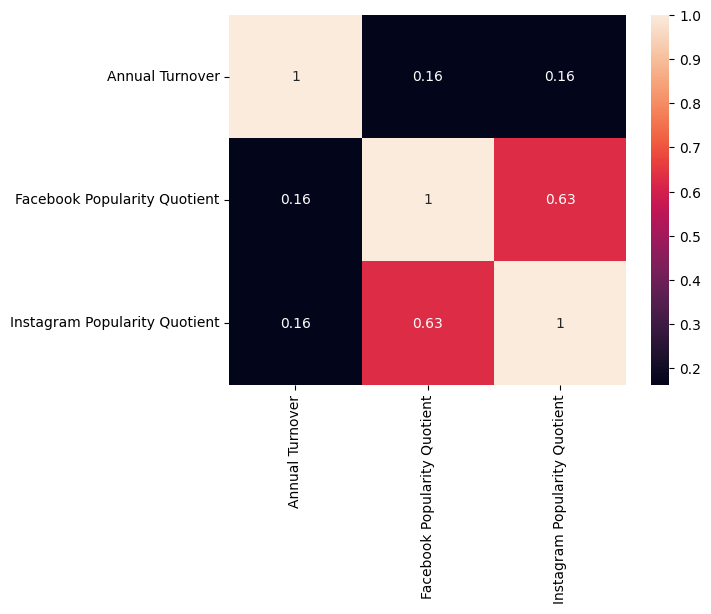

In [32]:
#Checking the correlation between continuous variable
import seaborn as sns
sns.heatmap(df[['Annual Turnover','Facebook Popularity Quotient','Instagram Popularity Quotient']].corr(),annot=True)

In [33]:
#One hot Encoding the categorical Variable
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#df = pd.get_dummies(df,columns=['Cuisine','Restaurant Type','Restaurant Theme'])
#test_df = pd.get_dummies(test_df,columns=['Cuisine','Restaurant Type','Restaurant Theme'])
en = OneHotEncoder(sparse_output=False)
df_en = en.fit_transform(df[['Cuisine','Restaurant Type','Restaurant Theme']])
one_hot_df = pd.DataFrame(df_en, columns=en.get_feature_names_out(['Cuisine','Restaurant Type','Restaurant Theme']))
df_rest = df.drop(['Cuisine','Restaurant Type','Restaurant Theme'],axis=1)
df_encoded = pd.concat([df_rest, one_hot_df], axis=1)

In [34]:
df_en_test = en.transform(test_df[['Cuisine','Restaurant Type','Restaurant Theme']])
one_hot_df_test = pd.DataFrame(df_en_test, columns=en.get_feature_names_out(['Cuisine','Restaurant Type','Restaurant Theme']))
df_rest_test = test_df.drop(['Cuisine','Restaurant Type','Restaurant Theme'],axis=1)
df_encoded_test = pd.concat([df_rest_test, one_hot_df_test], axis=1)

In [35]:
x = df_encoded.drop('Annual Turnover',axis=1)
y = df_encoded['Annual Turnover']

In [36]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_test = sc.transform(df_encoded_test)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_sc,y)

LinearRegression()

In [38]:
lr.score(x_sc,y)

0.1358154887950187

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(lr.predict(x_sc),y,squared=False)

20124447.978359126

In [42]:
y_test = lr.predict(x_test)

In [45]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test})

In [46]:
d

,Registration Number,Annual Turnover
0,20001,2.147585e+07
1,20002,4.362701e+07
2,20003,2.979892e+07
3,20004,4.185754e+07
4,20005,3.684404e+07
...,...,...
495,20496,3.635252e+07
496,20497,2.678426e+07
497,20498,3.360001e+07
498,20499,4.913436e+07


In [63]:
d.to_csv('submission.csv',index=False)

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()
rf.fit(x_sc,y)

RandomForestRegressor()

In [49]:
mean_squared_error(rf.predict(x_sc),y,squared=False)

7913355.852823827

In [50]:
y_test = rf.predict(x_test)

In [51]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test})

In [52]:
d.to_csv('submission.csv',index=False)

# Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
gb = GradientBoostingRegressor()
gb.fit(x_sc,y)

GradientBoostingRegressor()

In [56]:
mean_squared_error(gb.predict(x_sc),y,squared=False)

16523028.443923658

In [58]:
y_test = gb.predict(x_test)

In [59]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test})

In [60]:
d.to_csv('submission.csv',index=False)

# Elasticnet

In [61]:
from sklearn.linear_model import ElasticNet

In [62]:
e = ElasticNet()
e.fit(x_sc,y)

ElasticNet()

In [63]:
mean_squared_error(e.predict(x_sc),y,squared=False)

20189868.173291318

In [64]:
y_test = e.predict(x_test)

In [65]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test})

In [66]:
d.to_csv('submission.csv',index=False)

# KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
k = KNeighborsRegressor()
k.fit(x_sc,y)

KNeighborsRegressor()

In [69]:
mean_squared_error(k.predict(x_sc),y,squared=False)

18473700.885086358

In [70]:
y_test = k.predict(x_test)

In [71]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test})

In [72]:
d.to_csv('submission.csv',index=False)

# SVM

In [73]:
from sklearn.svm import SVR

In [74]:
s = SVR()
s.fit(x_sc, y)

SVR()

In [75]:
mean_squared_error(s.predict(x_sc),y,squared=False)

21660299.986688375

In [76]:
y_test = s.predict(x_test)

In [77]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test})

In [78]:
d.to_csv('submission.csv',index=False)

# Tunned Elastic net

In [80]:
# grid search hyperparameters for the elastic net
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x_sc, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -10896491.397
Config: {'alpha': 1.0, 'l1_ratio': 0.56}


In [81]:
e_tunned = ElasticNet(alpha = 1.0, l1_ratio= 0.56)
e_tunned.fit(x_sc,y)

ElasticNet(l1_ratio=0.56)

In [82]:
mean_squared_error(e_tunned.predict(x_sc),y,squared=False)

20171917.936347514

In [83]:
y_test = e_tunned.predict(x_test)

In [84]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test})

In [85]:
d.to_csv('submission.csv',index=False)

# Neural NEtwork

In [86]:
import tensorflow as tf

In [109]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1024,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(264,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'relu'))

In [110]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')
model.fit(x_sc,y,batch_size=16,epochs=100, validation_split=0.2)

Epoch 1/100
175/175 [==============================] - 12s 28ms/step - loss: 1464748667305984.0000 - mean_squared_error: 1464748667305984.0000 - val_loss: 1204686115831808.0000 - val_mean_squared_error: 1204686115831808.0000
Epoch 2/100
175/175 [==============================] - 4s 24ms/step - loss: 1464693772255232.0000 - mean_squared_error: 1464693772255232.0000 - val_loss: 1204535791976448.0000 - val_mean_squared_error: 1204535791976448.0000
Epoch 3/100
175/175 [==============================] - 4s 24ms/step - loss: 1464488821784576.0000 - mean_squared_error: 1464488821784576.0000 - val_loss: 1204226151677952.0000 - val_mean_squared_error: 1204226151677952.0000
Epoch 4/100
175/175 [==============================] - 4s 26ms/step - loss: 1464052345733120.0000 - mean_squared_error: 1464052345733120.0000 - val_loss: 1203558418481152.0000 - val_mean_squared_error: 1203558418481152.0000
Epoch 5/100
175/175 [==============================] - 4s 25ms/step - loss: 1463299786932224.0000 - mea

In [111]:
y_test = model.predict(x_test)
y_test_list = []
for i in y_test:
    y_test_list.append(i)

16/16 [==============================] - 1s 8ms/step


In [112]:
d = pd.DataFrame({'Registration Number':test['Registration Number'].values,'Annual Turnover':y_test_list})

In [113]:
d.to_csv('submission.csv',index=False)